# Gravidade normal

Este notebook calcula a gravidade normal $\gamma$ utilizando dois métodos diferentes. O primeiro é a fórmula de Somiglinana (Hofmann-Wellenhof e Moritz, 2005), que permite o cálculo de $\gamma$ sobre a superfície do elipsoide. O segundo é a fórmula analítica apresentada por Li e Gotze (2001), que permite calcular $\gamma$ não só na superfície do elipsoide, mas também abaixo ou acima desta.

References

* Li, X. and H. J. Götze, 2001, Tutorial: Ellipsoid, geoid, gravity, geodesy, and geophysics, 
    Geophysics, 66(6), p. 1660-1668, doi: 10.1190/1.1487109

* Hofmann-Wellenhof, B. and H. Moritz, 2005, Physical Geodesy, Springer-Verlag Wien,
    ISBN-13: 978-3-211-23584-3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

A figura abaixo ilustra um ponto $P$ com coordenadas geodésicas $h$ e $\varphi$, referidas a um elipsoide com semieixo maior $a$, semieixo menor $b$ e velocidade de rotação $\omega$. Para mais informações, veja o notebook `Aulas/Sistemas_coordenadas/coordenadas_geodesicas.ipynb`.

<img src='coordenadas_geodesicas.png' width="600">

## Função que define os parâmetros do WGS84

In [2]:
def WGS84():
    '''
    This function returns the following parameters defining the 
    reference elipsoid WGS84:
    a = semimajor axis [m]
    f = flattening
    GM = geocentric gravitational constant of the Earth 
         (including the atmosphere) [m**3/s**-2]
    omega = angular velocity [rad/s]
    
    output:
    a, f, GM, omega
    '''
    a = 6378137.0
    f = 1.0/298.257223563
    GM = 3986004.418*(10**8)
    omega = 7292115*(10**-11)
    
    return a, f, GM, omega

## Cálculo da gravidade normal $\gamma_{s}$ utilizando a fórmula de Somigliana

A fórmula de Somiglina é dada por:

### $\gamma_{s} = \dfrac{a \, \gamma_{a} \, cos^{2}\varphi + b \, \gamma_{b} \, sen^{2}\varphi}{\sqrt{a^{2} \, cos^{2}\varphi + b^{2} \, sen^{2}\varphi}}$

em que:

### $\gamma_{a} = \dfrac{G \, M}{a \, b} \,      \left( 1 - m - \dfrac{m}{6} \, \dfrac{e' \, q_{0}'}{q_{0}} \right)$

### $\gamma_{b} = \dfrac{G \, M}{a^{2}} \,      \left( 1 + \dfrac{m}{3} \, \dfrac{e' \, q_{0}'}{q_{0}} \right)$

### $e'= \dfrac{E}{b}$

### $E = \sqrt{a^{2} - b^{2}}$

### $m = \dfrac{\omega^{2} \, a^{2} \, b}{G \, M}$

### $q_{0} = \dfrac{1}{2}  \left[ \, \left( 1 + 3\dfrac{b^{2}}{E^{2}} \right) \, tan^{-1} \left( \dfrac{E}{b} \right) - 3\dfrac{b}{E} \right]$

### $q_{0}' = 3\left( 1 + \dfrac{b^{2}}{E^{2}} \right) \,  \left[ 1 - \dfrac{b}{E} \,tan^{-1} \left( \dfrac{E}{b} \right) \right] - 1$

sendo $a$, $b$, $\varphi$ e $\omega$ definidos de acordo com a figura mostrada acima. A fórmula de Somiglinana fornece a gravidade normal sobre a superfície do elipsoide, portanto, $h = 0$. Observe que esta expressão não depende da longitude $\lambda$.

In [3]:
def gamma_somigliana(a, f, GM, omega, phi):
    '''
    This function calculates the normal gravity by using
    the Somigliana's formula.
    
    input:
    a: float containing the semimajor axis [m]
    f: float containing the flattening
    GM: float containing the geocentric gravitational constant 
        of the Earth (including the atmosphere) [m**3/s**2]
    omega: float containing the angular velocity [rad/s]
    phi: array containing the geodetic latitudes [degree]
    
    output:
    gamma: array containing the values of normal gravity
           on the surface of the elipsoid for each geodetic
           latitude [mGal]
    '''
    b = a*(1.0-f)
    a2 = a**2
    b2 = b**2
    E = np.sqrt(a2 - b2)
    elinha = E/b
    bE = b/E
    Eb = E/b
    atg = np.arctan(Eb)
    q0 = 0.5*((1+3*(bE**2))*atg - (3*bE))
    q0linha = 3.0*(1+(bE**2))*(1-(bE*atg)) - 1
    m = (omega**2)*(a2)*b/GM
    aux = elinha*q0linha/q0
    gammaa = (GM/(a*b))*(1-m-(m/6.0)*aux)
    gammab = (GM/a2)*(1+(m/3.0)*aux)
    aux = np.deg2rad(phi)
    s2 = np.sin(aux)**2
    c2 = np.cos(aux)**2
    # the 10**5 converts from m/s**2 to mGal
    gamma = (10**5)*((a*gammaa*c2) + (b*gammab*s2))/np.sqrt((a2*c2) + (b2*s2))
    return gamma

## Gravidade normal sobre o WGS84 de acordo com a fórmula de Somigliana

In [4]:
phi = np.linspace(0.0, 90.0, 91)
a, f, GM, omega = WGS84()
gammas = gamma_somigliana(a, f, GM, omega, phi)

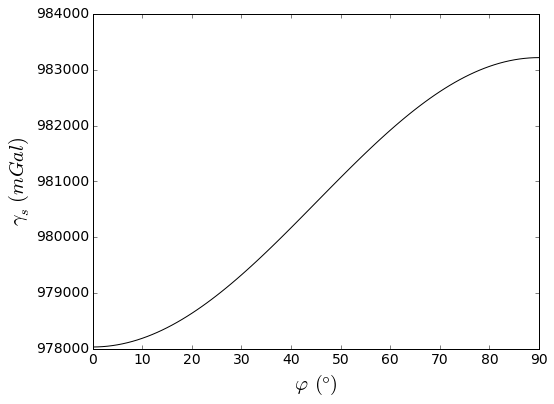

In [5]:
plt.close('all')
plt.figure(figsize=(8,6))
plt.xlabel('$\\varphi \, (\degree)$', fontsize = 20)
plt.ylabel('$\gamma_{s} \, (mGal)$', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(phi,gammas,'k-')
plt.show()

Observe que a gravidade normal predita pela fórmula de Somigliana ($\gamma_{s}$) sobre o elipsoide é mínima na latitude $\varphi = 0^{\circ}$ (equador) e máxima na latitude $\varphi = 90^{\circ}$ (pólo). Isso se deve ao efeito da aceleração centrífuga. A gravidade normal é a soma entre a aceleração gravitacional e a aceleração centrífuga produzida pela Terra Normal. A parcela gravitacional aponta, aproximadamente, para o centro do elipsoide. Já a parcela centrífuga é perperdicular ao eixo de rotação ($z$) e aponta para fora do elipsoide. O valor da aceleração centrífuga é $0 \, (mGal)$ na latitude $\varphi = 90^{\circ}$ (pólo) e atinge o valor máximo na latitude $\varphi = 0^{\circ}$ (equador). Ou seja, no pólo, a gravidade normal possui apenas a componente gravitacional. À medida em que a latitude $\varphi$ diminui até o equador, o valor da componente centrífuga aumenta e, devido ao fato de esta apontar para fora do elipsoide, a aceleração centrífuga contribui para a diminuição da amplitude da gravidade normal. No equador, as parcelas gravitacional e centrífuga da gravidade normal têm a mesma direção, mas sentidos contrários. Isso explica o motivo pelo qual a gravidade normal tem a menor amplitude na latitude $\varphi = 0^{\circ}$ (equador).

## Cálculo da gravidade normal $\gamma_{cf}$ utilizando a expressão analítica

A expressão analítica é dada por:

### $\gamma_{cf} = \dfrac{1}{W} \left[ \dfrac{GM}{b'^{2} + E^{2}} + \dfrac{\omega^{2} a^{2} E q'_{0}}{(b'^{2} + E^{2})q_{0}} \left( \dfrac{1}{2} sen^{2}\beta' - \dfrac{1}{6}\right) - \omega^{2} b' cos^{2}\beta'\right]$

em que

### $E = \sqrt{a^{2} - b^{2}}$

### $W = \sqrt{\dfrac{b'^{2}+E^{2}sen^{2}\beta'}{b'^{2}+E^{2}}}$

### $q_{0} = 3 \left( 1 + \dfrac{b'^{2}}{E^{2}} \right) \left( 1 - \dfrac{b'}{E}  tan^{-1}\dfrac{E}{b'}  \right) - 1$

### $q'_{0} = \dfrac{1}{2} \left[  \left( 1 + \dfrac{3 \, b^{2}}{E^{2}} \right) tan^{-1}\dfrac{E}{b} - \dfrac{3 \, b}{E} \right] $

### $b' = \sqrt{r''^{2} - E^{2} cos^{2}\beta'}$

### $cos \beta' = \sqrt{\dfrac{1}{2} + \dfrac{R}{2} - \sqrt{\dfrac{1}{4} + \dfrac{R^{2}}{4} - \dfrac{D}{2}}}$

### $R = \dfrac{r''^{2}}{E^{2}}$

### $D = \dfrac{d''^{2}}{E^{2}}$

### $r''^{2} = r'^{2} + z'^{2}$

### $d''^{2} = r'^{2} - z'^{2}$

### $r' = a \, cos\beta + h \, cos\varphi$

### $z' = b \, sen\beta + h \, sen\varphi$

### $tan\beta = \dfrac{b}{a} tan\varphi$

In [6]:
def gamma_closedform(a, f, GM, omega, phi, h):
    '''
    This function calculates the normal gravity by using
    a closed-form formula.
    
    input:
    a: float containing the semimajor axis [m]
    f: float containing the flattening
    GM: float containing the geocentric gravitational constant 
        of the Earth (including the atmosphere) [m**3/s**-2]
    omega: float containing the angular velocity [rad/s]
    phi: array containing the geodetic latitudes [degree]
    h: array containing the normal heights [m]
    
    output:
    gamma: array containing the values of normal gravity
           on the surface of the elipsoid for each geodetic
           latitude [mGal]
    '''
    b = a*(1.0-f)
    a2 = a**2
    b2 = b**2
    E = np.sqrt(a2 - b2)
    E2 = E**2
    bE = b/E
    Eb = E/b
    atanEb = np.arctan(Eb)
    phirad = np.deg2rad(phi)
    tanphi = np.tan(phirad)
    cosphi = np.cos(phirad)
    sinphi = np.sin(phirad)
    beta = np.arctan(b*tanphi/a)
    sinbeta = np.sin(beta)
    cosbeta = np.cos(beta)
    zl = b*sinbeta+h*sinphi
    rl = a*cosbeta+h*cosphi
    zl2 = zl**2
    rl2 = rl**2
    dll2 = rl2-zl2
    rll2 = rl2+zl2
    D = dll2/E2
    R = rll2/E2
    cosbetal = np.sqrt(0.5*(1+R) - np.sqrt(0.25*(1+R**2) - 0.5*D))
    cosbetal2 = cosbetal**2
    sinbetal2 = 1-cosbetal2
    bl = np.sqrt(rll2 - E2*cosbetal2)
    bl2 = bl**2
    blE = bl/E
    Ebl = E/bl
    atanEbl = np.arctan(Ebl)
    q0 = 0.5*((1+3*(bE**2))*atanEb - (3*bE))
    q0l = 3.0*(1+(blE**2))*(1-(blE*atanEbl)) - 1
    W = np.sqrt((bl2+E2*sinbetal2)/(bl2+E2))

    gamma = GM/(bl2+E2) - cosbetal2*bl*omega**2
    gamma += (((omega**2)*a2*E*q0l)/((bl2+E2)*q0))*(0.5*sinbetal2 - 1./6.)
    # the 10**5 converts from m/s**2 to mGal
    gamma = (10**5)*gamma/W
    
    return gamma

## Gravidade normal $\gamma_{cf}$ sobre o WGS84 de acordo com a fórmula analítica

In [7]:
phi = np.linspace(0.0, 90.0, 91)
a, f, GM, omega = WGS84()
h = 0.0
gammacf = gamma_closedform(a, f, GM, omega, phi, h)

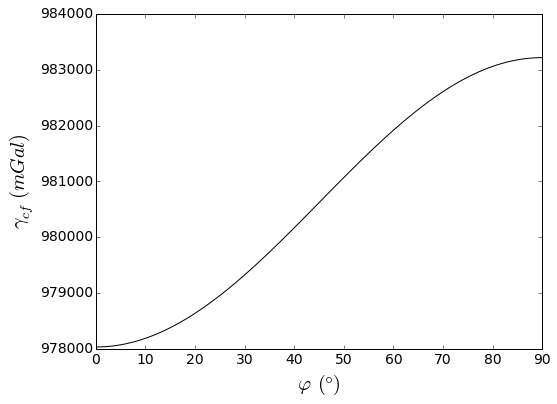

In [8]:
plt.close('all')
plt.figure(figsize=(8,6))
plt.xlabel('$\\varphi \, (\degree)$', fontsize = 20)
plt.ylabel('$\gamma_{cf} \, (mGal)$', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(phi,gammacf,'k-')
plt.show()

Observe que a gravidade normal predita pela expressão analítica ($\gamma_{cf}$) é similar ao que foi gerado pela fórmula de Somigliana ($\gamma_{s}$).

## Comparação entre $\gamma_{s}$ e $\gamma_{cf}$ sobre o elipsoide

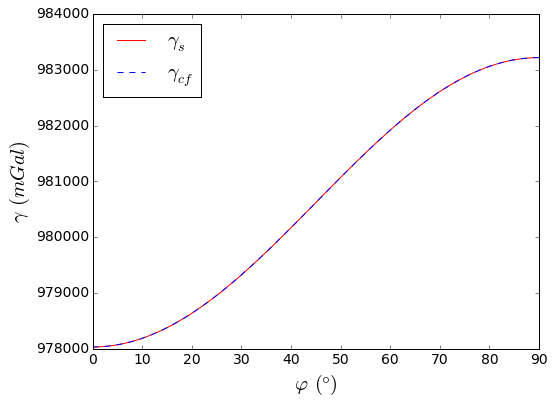

In [9]:
plt.close('all')
plt.figure(figsize=(8,6))
plt.plot(phi,gammas,'r-', label='$\gamma_{s}$')
plt.plot(phi,gammacf,'b--', label='$\gamma_{cf}$')
plt.xlabel('$\\varphi \, (\degree)$', fontsize = 20)
plt.ylabel('$\gamma \, (mGal)$', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=20)
plt.show()

Observe que, sobre o elipsoide, $\gamma_{s}$ e $\gamma_{cf}$ são praticamente iguais, como era de se esperar

## Análise do gradiente da gravidade normal ($\partial \gamma / \partial h$) na direção da normal ao elipsoide utilizando a expressão analítica

O gradiente $\partial \gamma / \partial h$ foi calculado para latitudes geodésicas $\varphi$ variando de $0^{\circ}$ a $90^{\circ}$ utilizando-se a fórmula analítica, de acordo com uma aproximação por diferenças finitas dada por:

### $\dfrac{\partial \gamma}{\partial h} \approx \dfrac{\gamma_{cf}(h_{0} + \Delta h, \varphi) - \gamma_{cf}(h_{0} - \Delta h, \varphi)}{2\,\Delta h}$ ,

em que $h_{0} = 0$ m, $\Delta h = 10$ m e o elipsoide de referência é o WGS84.

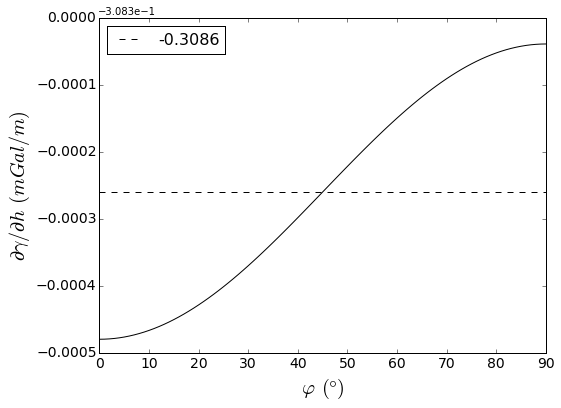

In [10]:
phi = np.linspace(0.0, 90.0, 91)
a, f, GM, omega = WGS84()
dh = 10.0
h = 0.0
h1 = h-dh
h2 = h+dh
gammacf1 = gamma_closedform(a, f, GM, omega, phi, h1)
gammacf2 = gamma_closedform(a, f, GM, omega, phi, h2)
dgamma = (gammacf2-gammacf1)/(2*dh)
dgamma_mean = np.mean(dgamma)

plt.close('all')
plt.figure(figsize=(8,6))
plt.plot(phi,dgamma,'k-')
lb = '%.4f' % dgamma_mean
plt.plot([phi[0], phi[-1]], [dgamma_mean, dgamma_mean], 'k--', label=lb)
plt.xlabel('$\\varphi \, (\degree)$', fontsize = 20)
plt.ylabel('$\partial \gamma / \partial h \, (mGal/m)$', fontsize = 20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize = 16)
plt.show()

Observe que o gradiente $\partial \gamma / \partial h$ é mínimo na latitude $\varphi = 0^{\circ}$ (equador) e máximo na latitude $\varphi = 90^{\circ}$ (pólo). No entanto, esta variação é muito pequena, indo de $-0.3088$ (mGal/m) até $-0.3083$ (mGal/m). O valor médio de $\partial \gamma / \partial h$ é $-0.3086$ (mGal/m).